In [1]:
import pandas as pd
import numpy as np
import quantstats as qs
import matplotlib.pyplot as plt

# Data
- benchmark : 台灣加權股價指數(Y9999)
- Strategy : 台灣所有上市上櫃公司
- 類別 : 報酬率資料
- 時間 : 2010/01/01 ~ 2014/01/19

In [2]:
benchmark = pd.read_csv('Y9999.txt', sep='#', encoding='ANSI', low_memory=False)  # 讀取data
benchmark.columns = ['ticker','name', 'date', 'return']
benchmark['return'] /= 100  # 單位 : % -> 小數
benchmark['date'] = pd.to_datetime(benchmark['date'].astype(str))  # data type -> datetime64 (針對原始data，type(date)要先轉乘成str函數.to_datetime才能正確讀取
benchmark = benchmark.set_index('date')['return']
benchmark.name = 'benchmark'
benchmark

date
2010-01-04    0.002411
2010-01-05    0.000433
2010-01-06    0.014153
2010-01-07   -0.010831
2010-01-08    0.005278
                ...   
2024-01-15    0.001941
2024-01-16   -0.011395
2024-01-17   -0.010669
2024-01-18    0.003846
2024-01-19    0.026337
Name: benchmark, Length: 3453, dtype: float64

In [3]:
data = pd.read_csv('stock.txt', sep='#', encoding='ANSI', low_memory=False)  # 讀取data
data.columns = ['ticker', 'name', 'date', 'return', 'turnover', 'market_cap(million)']  # 改column名稱
data['return'] /= 100  # 單位 : % -> 小數
data['turnover'] /= 100  # 單位 : % -> 小數
data['ticker'] = data['ticker'].astype(str)  # type(ticker) -> str
data['date'] = pd.to_datetime(data['date'].astype(str))  # data type -> datetime64 (針對原始data，type(date)要先轉乘成str函數.to_datetime才能正確讀取)
data

,ticker,name,date,return,turnover,market_cap(million)
0,1101,台泥,2010-01-04,0.008824,0.002521,112921
1,1102,亞泥,2010-01-04,-0.001445,0.002186,103157
2,1103,嘉泥,2010-01-04,0.016575,0.008018,13208
3,1104,環泥,2010-01-04,0.051429,0.012449,11111
4,1108,幸福,2010-01-04,0.008939,0.008079,3654
...,...,...,...,...,...,...
5228803,9949,琉園,2024-01-18,0.000000,0.000341,744
5228804,9950,萬國通,2024-01-18,0.000000,0.001902,3354
5228805,9951,皇田,2024-01-18,-0.005706,0.002817,5221
5228806,9960,邁達康,2024-01-18,0.005650,0.000566,897


In [4]:
return_df = data.pivot(index='date', columns='ticker', values='return').copy()  # 調整data方便後續分析(使用copy可以不修改原始data)
return_df

ticker,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.008824,-0.001445,0.016575,0.051429,0.008939,0.014286,0.022026,-0.014908,-0.005825,-0.004261,...,0.017308,0.012911,-0.011194,-0.006098,0.011204,0.007599,0.022508,0.044898,-0.036789,-0.006135
2010-01-05,0.034985,0.021708,-0.005435,-0.016304,-0.007752,0.004695,0.008621,0.001164,-0.001953,0.001427,...,-0.020794,0.001159,-0.003774,-0.003067,0.008310,-0.025641,-0.012579,-0.042969,0.006944,-0.012346
2010-01-06,0.021127,0.007082,-0.016393,0.008287,-0.001116,0.009346,0.012821,0.000000,0.005871,0.017094,...,0.003861,0.011574,-0.011364,-0.004615,0.024725,-0.004644,0.014331,0.024490,0.068966,0.000000
2010-01-07,-0.019310,-0.011252,-0.016667,-0.024658,0.016760,0.004630,-0.004219,-0.002326,-0.011673,-0.016807,...,0.015385,-0.017162,0.000000,-0.020093,0.008043,-0.007776,-0.017268,-0.011952,-0.006452,0.000000
2010-01-08,-0.004219,0.005690,0.014124,0.005618,0.010989,0.000000,0.008475,-0.009324,0.003937,0.008547,...,0.013258,-0.001164,-0.003831,-0.028391,-0.034574,0.006270,-0.001597,0.016129,0.008117,-0.006250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-12,0.001484,-0.003676,0.000000,0.001715,0.003236,-0.002762,-0.002639,0.000000,-0.012069,0.003521,...,0.002488,-0.002703,0.002439,-0.011628,-0.014218,0.000000,0.002123,-0.013055,0.001876,0.000000
2024-01-15,-0.002963,0.000000,-0.005348,-0.006849,-0.003226,-0.002770,-0.005291,0.002653,-0.010471,0.017544,...,-0.002481,0.002710,0.017032,0.000000,-0.007212,0.000000,0.010593,0.076720,0.003745,-0.002747
2024-01-16,-0.022288,-0.017220,-0.024194,-0.013793,-0.016181,-0.011111,-0.026596,-0.013228,-0.001764,-0.010345,...,0.000000,-0.029730,-0.007177,0.002941,-0.029056,-0.005602,0.000000,0.004914,-0.003731,-0.013774


# Strategy

In [5]:
def map_to_percentiles(data:pd.Series, min_counts:int=1) -> pd.Series:
    '''
    功能 : 計算data values的百分位數(mapping to [0,1])
    參數 :
        1. data : 預計算百分位數的data，type=pd.Series
        2. min_counts : 閾值，若data數目<mincount則return nan，default=1，type=int
    輸出 :
        data : 百分位數data，type=pd.Series
    '''
    # 複製原來的data，避免修改到原data
    data = data.copy() 
    
    # 找出所有非零的數據(有效data)
    valid_indices = ~np.isnan(data)  # True=1；False=0
    
    # 有效data數目<min_counts則return全為nan的series，長度=data，index跟data相同
    if np.sum(valid_indices)<min_counts:
        return pd.Series([np.nan]*len(data), index=data.index)
        
    # 計算百分位數
    # 找到有效數值的最小值和最大值
    min_val = np.min(data[valid_indices])
    max_val = np.max(data[valid_indices])

    # 將有效數值轉換為百分位數(mapping to [0,1])
    data[valid_indices] = (data[valid_indices] - min_val) / (max_val - min_val)

    return data

In [6]:
def signal(data:pd.DataFrame, days:int, threshold:float, min_counts:int=1, min_periods:int=1) -> pd.DataFrame :
    '''
    功能 : 偵測動能訊號，若過去days天股票累積報酬的百分位數超過threshold，則發出訊號
    參數 :
        1. data : 日報酬率資料，type=pd.DataFrame，index=date，columns=tickers
        2. days : 要取過去多少天計算累積報酬率，type=int
        3. threshold : 百分位數的閾值，累積報酬率超過多少才發出訊號，type=float
        4. min_counts : 有效股票數目的閾值。若data中當天有效股票數目(非零資料量)<mincount則return nan，default=1，type=int
        5. min_periods : 計算累積報酬率的閾值。若該股票過去資料量<min_periods則value=nan，default=1，type=int
    輸出 :
        momentum_signal : 訊號資料，有訊號value>0；無訊號value=0，type=pd.DataFrame
    '''
    # 複製原來的data，避免修改到原data
    data = data.copy()

    # 訊號處理
        # 計算所有股票過去days天累積報酬
    cum_ret_df = data.rolling(days, min_periods).sum()  # type=pd.DataFrame
    
        # 計算同一天所有累積報酬的百分位數(mapping to [0,1])
    for t in data.index :
        cum_ret_df.loc[t,:] = map_to_percentiles(cum_ret_df.loc[t,:], min_counts)  # type(ret)=pd.Series；type(percentiles_df)=pd.DataFrame

        # 偵測訊號
    momentum_signal = cum_ret_df - threshold  # 計算漲幅百分位數超過閾值的幅度，type=pd.DataFrame
    momentum_signal[ momentum_signal < 0 ] = 0  # 漲幅未超過閾值(<0)的value=0
    momentum_signal = momentum_signal.fillna(0)  # 將nan填0(避免後續影響計算return)

    return momentum_signal

In [7]:
def signal_topN(data:pd.DataFrame, days:int, N:int, min_counts:int=1, min_periods:int=1) -> pd.DataFrame :
    '''
    功能 : 偵測動能訊號，只賦予data中過去days天漲幅最多的前N檔股票訊號
    參數 :
        1. data : 日報酬率資料，type=pd.DataFrame，index=date，columns=tickers
        2. days : 要取過去多少天計算累積報酬率，type=int
        3. threshold : 股票數目的閾值，固定買進過去漲幅最多的前N檔股票，type=float
        4. min_counts : 有效股票數目的閾值。若data中當天有效股票數目(非零資料量)<mincount則return nan，default=1，type=int
        5. min_periods : 計算累積報酬率的閾值。若該股票過去資料量<min_periods則value=nan，default=1，type=int
    輸出 :
        momentum_signal : 訊號資料，有訊號value>0；無訊號value=0，type=pd.DataFrame
    '''
    # 複製原來的data，避免修改到原data
    data = data.copy()

    # 訊號處理
        # 計算所有股票過去days天累積報酬
    cum_ret_df = data.rolling(days, min_periods).sum()  # type=pd.DataFrame

        # 偵測訊號
    for t in data.index :
        sorted_cum_ret = cum_ret_df.loc[t,:].sort_values(ascending=False)  # 排序 : 高->低，type=pd.Series
        topN1 = sorted_cum_ret[N:N+1]  # 選取漲幅最多的第N+1檔股票，type=pd.Series
        cum_ret_df.loc[t,:] = cum_ret_df.loc[t,:] - topN1.values  # value>0的股票即為漲幅最多的前N檔股票，type=pd.DataFrame

        # 訊號數值
    cum_ret_df[ cum_ret_df <= 0 ] = 0  # 漲幅<=第N+1檔股票的signal=0
    momentum_signal = cum_ret_df.fillna(0)  # nan填0

    return momentum_signal

In [8]:
def normalize(data:pd.DataFrame) -> pd.DataFrame :
    '''
    功能 : 將data進行標準化，mapping to [0,1]
    參數 :
        data : 欲進行標準化的data，type=pd.DataFrame，index=date，columns=tickers
    輸出 :
        data : 標準化後的data，，type=pd.DataFrame，index=date，columns=tickers
    '''
    # 複製原來的data，避免修改到原data
    data = data.copy()

    # 標準化
    for t in data.index :
        sum_ = data.loc[t,:].sum()  # 計算當天總報酬
        sum_ = sum_ if sum_!= 0 else np.nan  # 避免分母(sum_)=0時下行code會報錯
        data.loc[t,:] = data.loc[t,:] / sum_  # 標準化當天各個data

    return data

# Backtest

In [9]:
def calc_turnover_rate(data:pd.DataFrame, weights:pd.DataFrame) -> pd.DataFrame :
    '''
    功能 : 計算投組中每個股票的日週轉率
    參數 : 
        1. data : 日報酬率資料，type=pd.DataFrame，index=date，columns=tickers
        2. weights : 投組權重，type=pd.DataFrame，index=date，columns=tickers
    輸出 :
        firm_turnover_rate : 投組中每個股票的日週轉率，type=pd.DataFrame，index=date，columns=tickers
    '''
    # 複製原來的data和weights，避免修改到原始資料
    data = data.copy()
    weights = weights.copy()

    # 計算每檔股票的週轉率
    weights = weights.fillna(0)  # nan填0避免影響下行code的計算
    weights_drift = weights.shift(1) * ( data.add(1) )
    weights_drift = normalize(weights_drift)  # 標準化，使權重介於0~1
    firm_turnover_rate = (weights_drift - weights).abs()  # 計算週轉率

    return firm_turnover_rate

In [10]:
def backtest(data:pd.DataFrame, weights:pd.DataFrame, transaction_cost:float) :
    '''
    功能 : 回測一組weights的績效
    輸入 :
        1. data : 日報酬率資料(原始data)，type=pd.DataFrame，index=date，columns=tickers
        2. weights : 欲回測的權重，由策略所計算出來，type=pd.DataFrame，index=date，columns=tickers
        3. transaction_cost : 單邊交易成本，台股抓0.002，type=float
    輸出 :
        1. strategy_gross_return : 略策歷史毛報酬，type=pd.Series
        2. strategy_net_return : 略策歷史淨報酬，type=pd.Series
    '''
    # 複製原來的data和weights，避免修改到原始資料
    data = data.copy()
    weights = weights.copy()

    # 交易成本
    firm_turnover_rate = calc_turnover_rate(data, weights)
    firm_transaction_cost = firm_turnover_rate * transaction_cost

    # 計算每檔股票報酬
    firm_gross_return = (weights.shift(1) * data).fillna(0)  # 每檔股票各自的毛報酬(未扣除交易成本)  
            # .shift(1)的原因為weights是用第t期以前的data所計算出來的，記為weights_t；持有股票的各自報酬率發生在t+1時期，記為data_t+1
            # 我們是在第t期收盤後計算策略權重，第t+1期一開盤買進，每檔股票各自報酬_t+1 = weights_t * data_t+1
            # fillna(0) : nan填0
    firm_net_return = firm_gross_return - firm_transaction_cost  # 每檔股票各自的淨報酬(扣除交易成本)

    # 計算策略報酬
    strategy_gross_return = firm_gross_return.sum(axis=1).fillna(0)  # 策略毛報酬(未扣除交易成本)，axis=1針對index(row)方向加總，計算每日策略報酬 
    strategy_net_return = firm_net_return.sum(axis=1).fillna(0)  # 策略淨報酬(扣除交易成本)
    
    return strategy_gross_return, strategy_net_return

In [11]:
momentum_signal = signal(data=return_df, days=63, threshold=0.9, min_counts=100, min_periods=63)  #偵測動能訊號
momentum_weights = normalize(data=momentum_signal)  # 根據訊號決定持有權重(標準化權重到0~1)
momentum_weights.fillna(0)  # nan填0避免影響到報酬率計算
strategy_gross_return,  strategy_net_return = backtest(data=return_df, weights=momentum_weights, transaction_cost=0.002)  # 回測動能策略績效

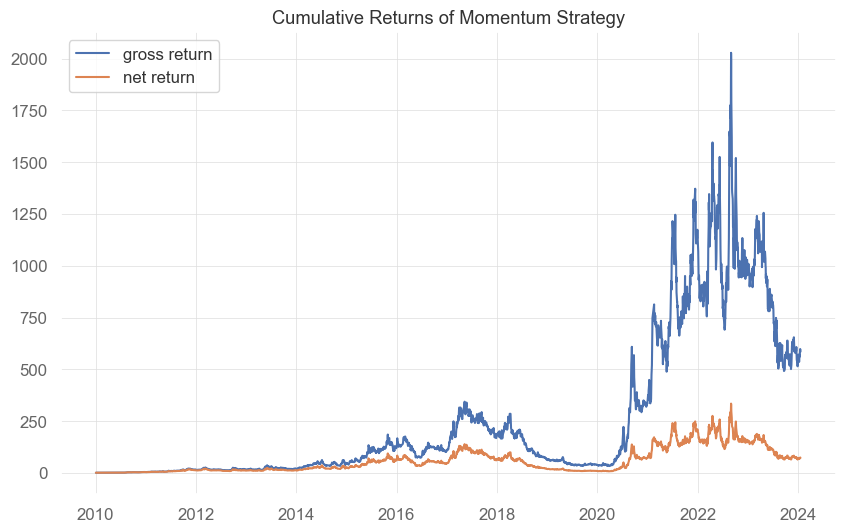

In [12]:
cum_strategy_gross_return = strategy_gross_return.add(1).cumprod()  # 累積毛報酬
cum_strategy_net_return = strategy_net_return.add(1).cumprod()  # 累積淨報酬
plt.title( 'Cumulative Returns of Momentum Strategy' )
gross_return_plot = plt.plot(cum_strategy_gross_return, label='gross return')  # 累積毛報酬的圖
net_return_plot = plt.plot(cum_strategy_net_return, label='net return')  # 累積淨報酬的圖
plt.legend()

In [13]:
# 毛報酬
gross_mean = strategy_gross_return.mean()*252
gross_std = strategy_gross_return.std()*(252**0.5)
gross_sharpe = gross_mean / gross_std
gross_series = pd.Series([gross_mean, gross_std, gross_sharpe], index=['mean', 'std', 'sharpe'])

# 淨報酬
net_mean = strategy_net_return.mean()*252
net_std = strategy_net_return.std()*(252**0.5)
net_sharpe = net_mean / net_std
net_series = pd.Series([net_mean, net_std, net_sharpe], index=['mean', 'std', 'sharpe'])

pd.DataFrame( { 'gross':gross_series, 'net':net_series } )

,gross,net
mean,0.712110,0.560959
std,0.702571,0.704164
sharpe,1.013576,0.796632


# 異常表現
- 跡象 : 在某些時間(EX:2022)策略的累積報酬極高
- 推測 : 某些股票的在某個時間的報酬率極高，導致這些股票的signal極大(持有權重極大)
- 檢驗方法 : 將股票總報酬貢獻度進行排序，查看是否貢獻度集中在某些股票上

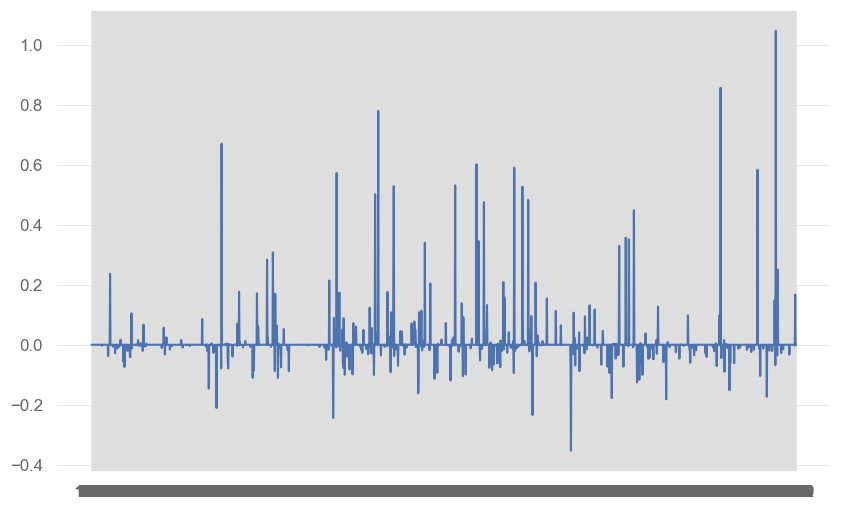

In [14]:
# 依據公司類別進行加總，計算各個股票的總報酬貢獻
firm_total_return = (return_df*momentum_weights.shift(1)).sum(axis=0)
plt.plot( firm_total_return.index, firm_total_return)

- 由上圖可發現有幾檔股票的總報酬貢獻度特別高
- 下圖將總報酬貢獻度由高至低進行排序

<Axes: xlabel='ticker'>

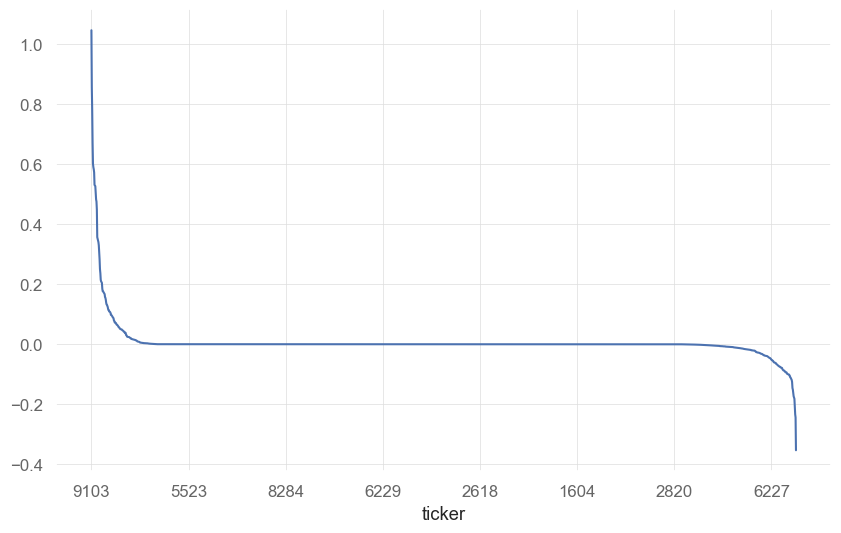

In [15]:
firm_total_return.sort_values(ascending=False).plot()

In [16]:
# 總報酬貢獻排行(高->低)
firm_total_return.sort_values(ascending=False)

ticker
9103    1.046710
8066    0.856660
3406    0.779590
2364    0.670544
4609    0.601753
          ...   
6603   -0.181957
2349   -0.210915
5340   -0.233884
3064   -0.244173
6103   -0.353559
Length: 1814, dtype: float64

- 發現有些股票的總報酬貢獻度特高
- 下圖為貢獻度最高的『美德向邦(9103)』的股價趨勢圖

<Axes: xlabel='date'>

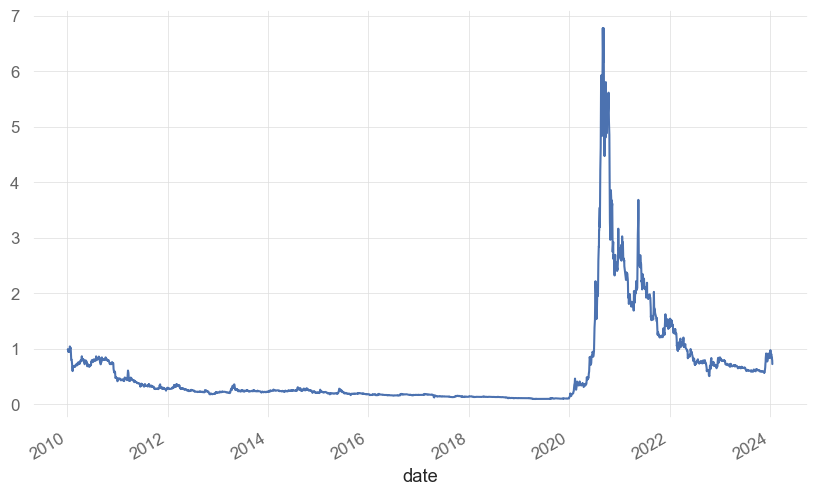

In [17]:
return_df['9103'].add(1).cumprod().plot()

# 參數最佳化 - days

<Axes: title={'center': 'Sharpe ratio for different time horizons '}>

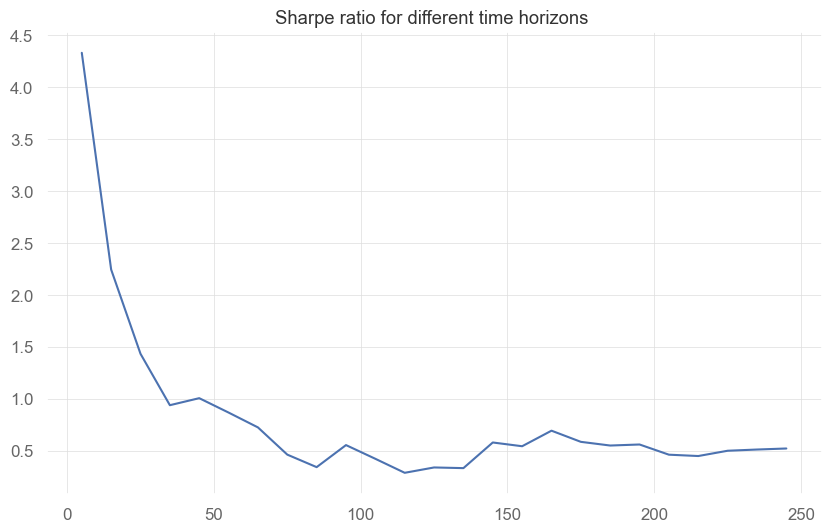

In [18]:
days_list = range(5,252,10)
sharpe_list = []
for d in days_list :
    momentum_signal_days_temp = signal(data=return_df, days=d, threshold=0.9, min_counts=100, min_periods=d)  #偵測動能訊號
    momentum_weights_days_temp = normalize(data=momentum_signal_days_temp)  # 根據訊號決定持有權重
    strategy_gross_return_temp,  strategy_net_return_temp  = backtest(data=return_df, weights=momentum_weights_days_temp, transaction_cost=0.002)  # 回測動能策略績效
    net_mean_temp = strategy_net_return_temp.mean()*252  # 策略(算術)平均報酬
    net_std_temp = strategy_net_return_temp.std()*(252**0.5)  # 策略標準差
    net_sharpe_temp = net_mean_temp / net_std_temp  # 策略Sharpe
    sharpe_list.append(net_sharpe_temp)
pd.Series(sharpe_list, index = days_list).plot( title = 'Sharpe ratio for different time horizons ')

In [19]:
# 依sharpe由大排到小
pd.Series(sharpe_list, index = days_list).sort_values(ascending=False)

5      4.332962
15     2.245398
25     1.433986
45     1.006666
35     0.938995
55     0.868097
65     0.725167
165    0.693541
175    0.586077
145    0.579834
195    0.560547
95     0.554830
185    0.550563
155    0.543786
245    0.522027
235    0.512041
225    0.500284
75     0.462984
205    0.462364
215    0.449445
105    0.422735
85     0.342439
125    0.339349
135    0.332967
115    0.287873
dtype: float64

# 其他分析

## 每日訊號數量(持有標的數量)

In [20]:
momentum_signal = signal(data=return_df, days=252, threshold=0.9, min_counts=100, min_periods=63)  #偵測動能訊號
momentum_weights = normalize(data=momentum_signal)  # 根據訊號決定持有權重(標準化權重到0~1)
momentum_weights.fillna(0)  # nan填0避免影響到報酬率計算
strategy_gross_return,  strategy_net_return = backtest(data=return_df, weights=momentum_weights, transaction_cost=0.002)  # 回測動能策略績效

<Axes: title={'center': 'Daily Signal Count'}, xlabel='date'>

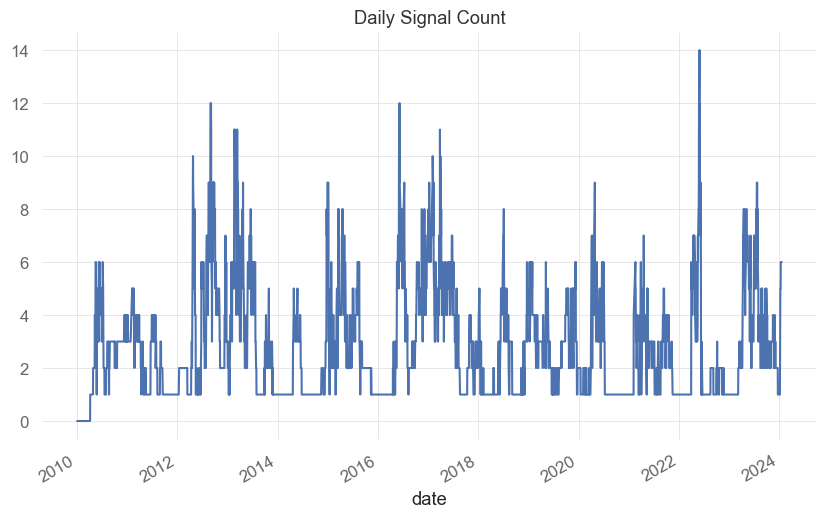

In [21]:
# momentum_signal>0 -> 買進
(momentum_signal>0).astype(int).sum(axis=1).plot( title = 'Daily Signal Count' )  # 計算momentum_signal>0的數量

## 選股方式 : 比例 -> 固定數量

In [22]:
momentum_signal = signal_topN(data=return_df, days=252, N = 10, min_counts=100, min_periods=63)  # 偵測動能訊號
                                                                                                 # 固定只持有過去漲幅最多的前10檔股票
momentum_weights = normalize(data=momentum_signal)  # 根據訊號決定持有權重(標準化權重到0~1)
momentum_weights.fillna(0)  # nan填0避免影響到報酬率計算
strategy_gross_return,  strategy_net_return = backtest(data=return_df, weights=momentum_weights, transaction_cost=0.002)  # 回測動能策略績效

<Axes: title={'center': 'Daily Signal Count'}, xlabel='date'>

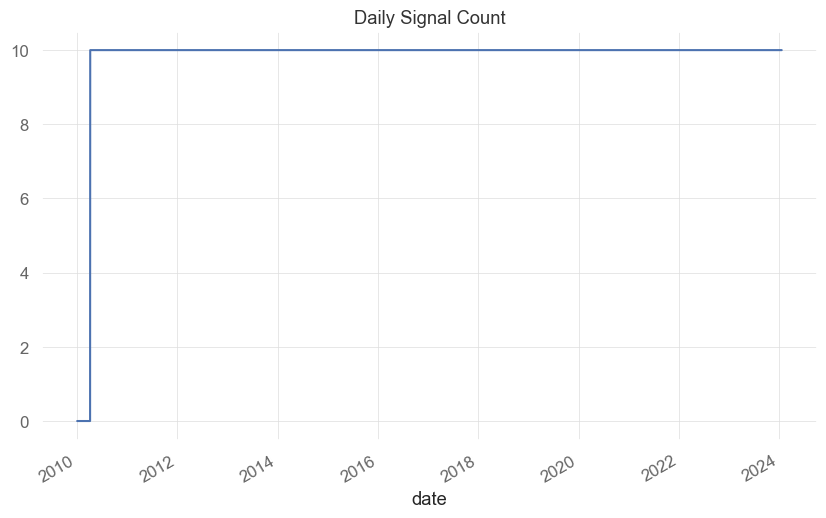

In [23]:
# 檢驗是否成功固定數量
(momentum_signal>0).astype(int).sum(axis=1).plot( title = 'Daily Signal Count' )  # 計算momentum_signal>0的數量

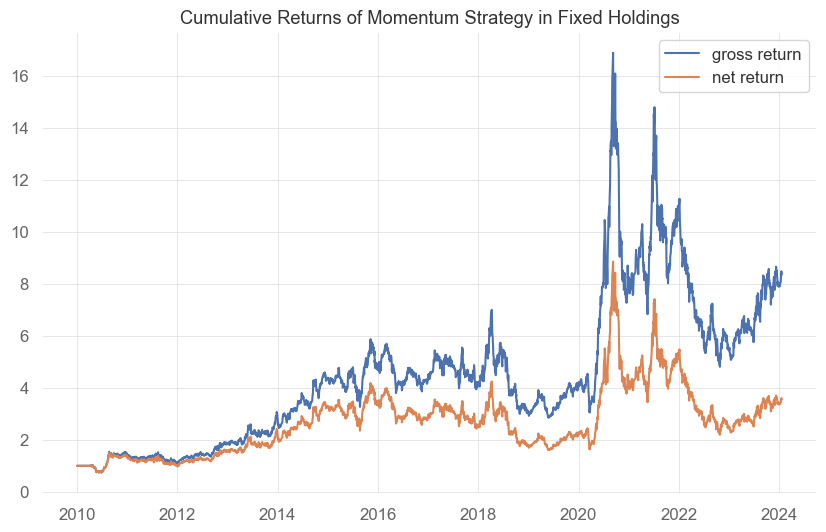

In [24]:
cum_strategy_gross_return = strategy_gross_return.add(1).cumprod()  # 累積毛報酬
cum_strategy_net_return = strategy_net_return.add(1).cumprod()  # 累積淨報酬
plt.title( 'Cumulative Returns of Momentum Strategy in Fixed Holdings' )
gross_return_plot = plt.plot(cum_strategy_gross_return, label='gross return')  # 累積毛報酬的圖
net_return_plot = plt.plot(cum_strategy_net_return, label='net return')  # 累積淨報酬的圖
plt.legend()

In [25]:
# 毛報酬
gross_mean = strategy_gross_return.mean()*252  # 策略(算術)平均報酬
gross_std = strategy_gross_return.std()*(252**0.5)  # 策略標準差
gross_sharpe = gross_mean / gross_std  # 策略sharpe
gross_series = pd.Series([gross_mean, gross_std, gross_sharpe], index=['mean', 'std', 'sharpe'])

# 淨報酬
net_mean = strategy_net_return.mean()*252  # 策略(算術)平均報酬
net_std = strategy_net_return.std()*(252**0.5)  # 策略標準差
net_sharpe = net_mean / net_std  # 策略sharpe
net_series = pd.Series([net_mean, net_std, net_sharpe], index=['mean', 'std', 'sharpe'])

pd.DataFrame( { 'gross':gross_series, 'net':net_series } )

,gross,net
mean,0.225754,0.163218
std,0.375556,0.375625
sharpe,0.601119,0.434525


<Axes: title={'center': 'Sharpe ratio for different time horizons in fixed holdings'}, xlabel='time horizons'>

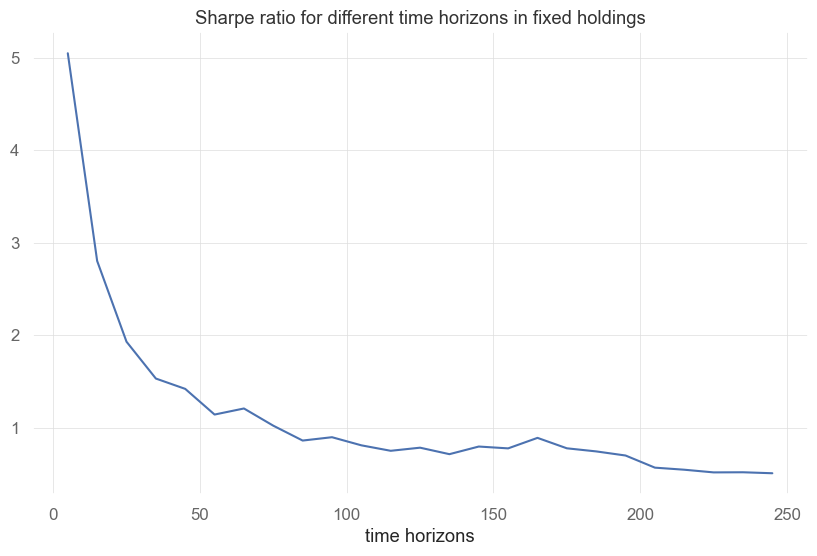

In [26]:
days_list = range(5,252,10)
sharpe_list = []
for d in days_list :
    momentum_signal_days_temp = signal_topN(data=return_df, days=d, N=10, min_counts=100, min_periods=d)  #偵測動能訊號
    momentum_weights_days_temp = normalize(data=momentum_signal_days_temp)  # 根據訊號決定持有權重
    strategy_gross_return_temp,  strategy_net_return_temp  = backtest(data=return_df, weights=momentum_weights_days_temp, transaction_cost=0.002)  # 回測動能策略績效
    net_mean_temp = strategy_net_return_temp.mean()*252  # 策略(算術)平均報酬
    net_std_temp = strategy_net_return_temp.std()*(252**0.5)  # 策略標準差
    net_sharpe_temp = net_mean_temp / net_std_temp  # 策略Sharpe
    sharpe_list.append(net_sharpe_temp)
pd.Series(sharpe_list, index = days_list).plot( title = 'Sharpe ratio for different time horizons in fixed holdings', xlabel = 'time horizons' )

In [27]:
# 依sharpe由大排到小
pd.Series(sharpe_list, index = days_list).sort_values(ascending=False)

5      5.048021
15     2.802032
25     1.928612
35     1.530131
45     1.418458
65     1.206446
55     1.140754
75     1.020348
95     0.895730
165    0.888619
85     0.859603
105    0.807964
145    0.794865
125    0.782465
175    0.775790
155    0.775029
115    0.748834
185    0.742225
135    0.712355
195    0.697770
205    0.566513
215    0.544200
235    0.516625
225    0.515267
245    0.506007
dtype: float64

# 使用最佳參數設定生成分析圖表

In [28]:
# 最佳參數設定(使sharpe ratio 最大)
momentum_signal_best = signal_topN(data=return_df, days=5, N = 10, min_counts=100, min_periods=5)  # 偵測動能訊號
                                                                                                   # 固定只持有過去漲幅最多的前10檔股票
momentum_weights_best = normalize(data=momentum_signal_best)  # 根據訊號決定持有權重(標準化權重到0~1)
momentum_weights_best.fillna(0)  # nan填0避免影響到報酬率計算
best_strategy_gross_return,  best_strategy_net_return = backtest(data=return_df, weights=momentum_weights_best, transaction_cost=0.002)  # 回測動能策略績效

In [29]:
# 使用套件生成一個html檔案，包含精美分析圖表
qs.reports.html(best_strategy_net_return, benchmark=benchmark, output='Strategy performance analysis.html', titile='strategy', download_filename='strategy.html')

C:\Users\Administrator.USER-20180817XC\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Administrator.USER-20180817XC\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Administrator.USER-20180817XC\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future ver